# Data Review and Preprocessing

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import ztf # shared scritp where the util functions are stored

labeltocode = ztf.class_code
codetolabel = dict()
for k, v in labeltocode.items():
    if v == 14:
        codetolabel[v] = 'SNE'
    else:
        codetolabel[v] = k

### Getting lightcurves 

In [2]:
path_meta = './datasets/raw_data/ztf/dfcrossmatches_prioritized_v6.0.csv'
path_dete = './datasets/raw_data/ztf/detections.csv'

In [3]:
%%time
use_chunks = False # ~15min and 7.52 GB RAM using chunks - ~4min and 32.6 GB RAM else
lightcurves, labels, oids = ztf.get_light_curves(path_meta, path_dete, chunks=False)

CPU times: user 3min 45s, sys: 20.7 s, total: 4min 6s
Wall time: 4min 6s


In [4]:
uniques, counts = np.unique(labels, return_counts=True)

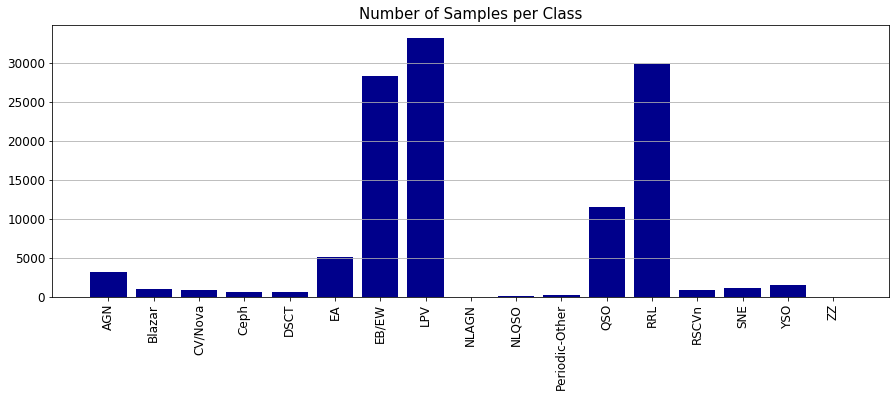

In [5]:
LABELS = [codetolabel[u] for u in uniques]
plt.figure(figsize=(15,5))
plt.bar(uniques, counts, align='center', color='darkblue')
plt.xticks(uniques, LABELS, rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.title('Number of Samples per Class', fontsize=15)
plt.grid(axis='y')
plt.show()

### Train, validation and test split

In [7]:
subsets = ztf.train_val_test_split(lightcurves, labels)

In [10]:
print('TRAIN: {} - {}\nVAL: {} - {}\nTEST:{} - {}'.format(
                                         subsets['train']['x'].shape, subsets['train']['y'].shape,
                                         subsets['validation']['x'].shape, subsets['validation']['y'].shape,
                                         subsets['test']['x'].shape, subsets['test']['y'].shape))

TRAIN: (59019,) - (59019,)
VAL: (29506,) - (29506,)
TEST:(29524,) - (29524,)


### Padding Light Curves

In [11]:
X_train, y_train, m_train = ztf.pad_lightcurves(subsets['train']['x'], subsets['train']['y'], 
                                                maxobs=200)
X_valid, y_valid, m_valid = ztf.pad_lightcurves(subsets['validation']['x'], subsets['validation']['y'], 
                                                maxobs=200)

In [14]:
maxobs_testing = np.max([x.shape[0] for x in subsets['test']['x']])
X_test, y_test, m_test = ztf.pad_lightcurves(subsets['test']['x'], subsets['test']['y'], 
                                             maxobs=maxobs_testing)

In [21]:
print('TRAIN: {}  - {}\nVALID: {}  - {}\nTEST:  {} - {}'.format(X_train.shape, y_train.shape,
                                                          X_valid.shape, y_valid.shape,
                                                          X_test.shape, y_test.shape))

TRAIN: (62969, 200, 4)  - (62969,)
VALID: (31471, 200, 4)  - (31471,)
TEST:  (29525, 1064, 4) - (29525,)


### Writting Records